<a href="https://colab.research.google.com/github/aljebraschool/Cryptocurrency-Staking-Database-and-Analysis/blob/main/Tezos_Dataset_Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis - Visualization and Descriptive Statistics


## Basic Data Cleaning

In [ ]:
#import the necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#read merged files as pandas
data1 = pd.read_csv('/content/merged_baker_files.csv')

### Data Loading and Cleaning


In [ ]:
#view a head portion
data1.head(100)

baker status  reliability  staking_fee  \
0   tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1   tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2   tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3   tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4   tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   
..                                   ...    ...          ...          ...   
95  tz1abmz7jiCV2GH2u81LRrGgAFFgvQgiDiaf   open       0.9727       0.1500   
96  tz1WmoPVuCJMjsVGyfBLi7wuRPyRSM2WtBTw   open       0.9719       0.0700   
97  tz1ffYUjwjduZkoquw8ryKRQaUjoWJviFVK6   open       0.9700       0.0300   
98  tz1L6UDJ4EEvhpY84YjJpBg51bKMG1Usyrgz   open       0.9696       0.1000   
99  tz1NRGxXV9h6SdNaZLcgmjuLx3hyy2f8YoGN   open       0.9668       0.0900   

    min_delegation  min_payout  delegation_capacity  network_share  \
0              0.0         0.0        -1.312674e+05        0.00001   
1              0.0         0.0        -6.716244e+03        0.00145   
2           1000.0         0.0         1.671672e+07        0.06274   
3              0.0         0.0         2.448521e+06        0.03825   
4              0.0         0.0         4.696616e+06        0.01183   
..             ...         ...                  ...            ...   
95            50.0         0.0         1.343973e+05        0.00061   
96             0.0         0.0         5.700912e+03        0.00008   
97            10.0         0.0        -1.286530e+04        0.00020   
98             0.0         0.0         1.049853e+05        0.00003   
99           100.0         0.0         4.552766e+04        0.00013   

    share_cumulative  cycle  
0            0.00001      1  
1            0.00146      1  
2            0.06420      1  
3            0.10245      1  
4            0.11428      1  
..               ...    ...  
95           0.36024      1  
96           0.36032      1  
97           0.36052      1  
98           0.36055      1  
99           0.36068      1  

[100 rows x 10 columns]

In [ ]:
#check its shape
data1.shape

(2305, 10)

In [ ]:
#check column names
data1.columns

Index(['baker', 'status', 'reliability', 'staking_fee', 'min_delegation',
       'min_payout', 'delegation_capacity', 'network_share',
       'share_cumulative', 'cycle'],
      dtype='object')

In [ ]:
#check data information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   baker                2305 non-null   object 
 1   status               2305 non-null   object 
 2   reliability          2305 non-null   float64
 3   staking_fee          2287 non-null   float64
 4   min_delegation       2305 non-null   float64
 5   min_payout           2305 non-null   float64
 6   delegation_capacity  2305 non-null   float64
 7   network_share        2305 non-null   float64
 8   share_cumulative     2305 non-null   float64
 9   cycle                2305 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 180.2+ KB


In [ ]:
#check mission values
data1.isnull().sum()

baker                   0
status                  0
reliability             0
staking_fee            18
min_delegation          0
min_payout              0
delegation_capacity     0
network_share           0
share_cumulative        0
cycle                   0
dtype: int64

In [ ]:
#drop missing values
data1.dropna()

baker status  reliability  staking_fee  \
0     tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1     tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2     tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3     tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4     tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   
...                                    ...    ...          ...          ...   
2300  tz1W5VkdB5s7ENMESVBtwyt9kyvLqPcUczRT   open       0.9042       0.0990   
2301  tz1R664EP6wjcM1RSUVJ7nrJisTpBW9QyJzP   open       0.8906       0.1500   
2302  tz1UvkANVPWppVgMkLnvN7BwYZsCP7vm6NVd   open       0.8806       0.0500   
2303  tz1WvL7MKyCuUHfC3FxPFyiXcy8hHTBT3vjE   open       0.8165       0.0500   
2304  tz1Qrbo9FgSjz4RQP3iry9h3KFtoeu1KjFXV   open       0.7225       0.0500   

      min_delegation  min_payout  delegation_capacity  network_share  \
0                0.0         0.0        -1.312674e+05        0.00001   
1                0.0         0.0        -6.716244e+03        0.00145   
2             1000.0         0.0         1.671672e+07        0.06274   
3                0.0         0.0         2.448521e+06        0.03825   
4                0.0         0.0         4.696616e+06        0.01183   
...              ...         ...                  ...            ...   
2300           100.0         0.0         8.127942e+04        0.00086   
2301             0.0         0.0         1.157476e+05        0.00007   
2302           500.0         1.0         4.153767e+05        0.00036   
2303             0.0         0.0         5.897775e+03        0.00003   
2304             0.0         0.0        -1.313180e+04        0.00000   

      share_cumulative  cycle  
0              0.00001      1  
1              0.00146      1  
2              0.06420      1  
3              0.10245      1  
4              0.11428      1  
...                ...    ...  
2300           0.36546     18  
2301           0.36553     18  
2302           0.36589     18  
2303           0.36592     18  
2304           0.36592     18  

[2287 rows x 10 columns]

In [ ]:
data1.head()

baker status  reliability  staking_fee  \
0  tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1  tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4  tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   

   min_delegation  min_payout  delegation_capacity  network_share  \
0             0.0         0.0        -1.312674e+05        0.00001   
1             0.0         0.0        -6.716244e+03        0.00145   
2          1000.0         0.0         1.671672e+07        0.06274   
3             0.0         0.0         2.448521e+06        0.03825   
4             0.0         0.0         4.696616e+06        0.01183   

   share_cumulative  cycle  
0           0.00001      1  
1           0.00146      1  
2           0.06420      1  
3           0.10245      1  
4           0.11428      1

In [ ]:
#check for missing values again to confirm
data1.isnull().sum()

baker                   0
status                  0
reliability             0
staking_fee            18
min_delegation          0
min_payout              0
delegation_capacity     0
network_share           0
share_cumulative        0
cycle                   0
dtype: int64

In [ ]:
#check for unique values in the dataset
unique_values = data1.nunique()
print(unique_values)

baker                   135
status                    1
reliability             638
staking_fee              35
min_delegation           14
min_payout                7
delegation_capacity    2295
network_share           395
share_cumulative       2208
cycle                    18
dtype: int64


In [ ]:
#check for duplicate
duplicates = data1.duplicated()

In [ ]:
print(f'Number of duplicated rows:{duplicates.sum()}') #no duplicated rows

Number of duplicated rows:0


In [ ]:
data1.head()

baker status  reliability  staking_fee  \
0  tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1  tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4  tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   

   min_delegation  min_payout  delegation_capacity  network_share  \
0             0.0         0.0        -1.312674e+05        0.00001   
1             0.0         0.0        -6.716244e+03        0.00145   
2          1000.0         0.0         1.671672e+07        0.06274   
3             0.0         0.0         2.448521e+06        0.03825   
4             0.0         0.0         4.696616e+06        0.01183   

   share_cumulative  cycle  
0           0.00001      1  
1           0.00146      1  
2           0.06420      1  
3           0.10245      1  
4           0.11428      1

#Exploratory Data Analysis (EDA)

## Baker Dataset

In [ ]:
#descriptive statistics of the dataset
data1.describe().T.round(2)

count       mean         std        min      25%  \
reliability          2305.0       0.97        0.03       0.71     0.97   
staking_fee          2287.0       0.09        0.04       0.01     0.07   
min_delegation       2305.0      92.25      288.77       0.00     0.00   
min_payout           2305.0       0.09        0.49       0.00     0.00   
delegation_capacity  2305.0  448498.89  1802161.82 -635612.32  6252.10   
network_share        2305.0       0.00        0.01       0.00     0.00   
share_cumulative     2305.0       0.27        0.10       0.00     0.18   
cycle                2305.0       9.53        5.22       1.00     5.00   

                          50%        75%          max  
reliability              0.98       0.99         1.00  
staking_fee              0.10       0.10         0.25  
min_delegation           1.00      10.00      2000.00  
min_payout               0.00       0.00         5.00  
delegation_capacity  47477.24  197629.72  18406419.26  
network_share            0.00       0.00         0.07  
share_cumulative         0.34       0.35         0.37  
cycle                   10.00      14.00        18.00

In [ ]:
data1.head()

baker status  reliability  staking_fee  \
0  tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1  tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4  tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   

   min_delegation  min_payout  delegation_capacity  network_share  \
0             0.0         0.0        -1.312674e+05        0.00001   
1             0.0         0.0        -6.716244e+03        0.00145   
2          1000.0         0.0         1.671672e+07        0.06274   
3             0.0         0.0         2.448521e+06        0.03825   
4             0.0         0.0         4.696616e+06        0.01183   

   share_cumulative  cycle  
0           0.00001      1  
1           0.00146      1  
2           0.06420      1  
3           0.10245      1  
4           0.11428      1

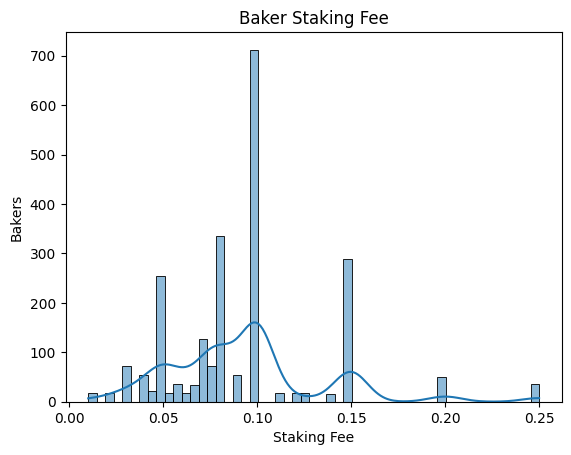

In [ ]:
#Explore the distribution of the baker staking fee using kde
sns.histplot(data1['staking_fee'], kde = True)
plt.title('Baker Staking Fee')
plt.xlabel('Staking Fee')
plt.ylabel('Bakers')
plt.show()


<ipython-input-18-313cefa784fb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['staking_fee'], shade=True, color='skyblue')


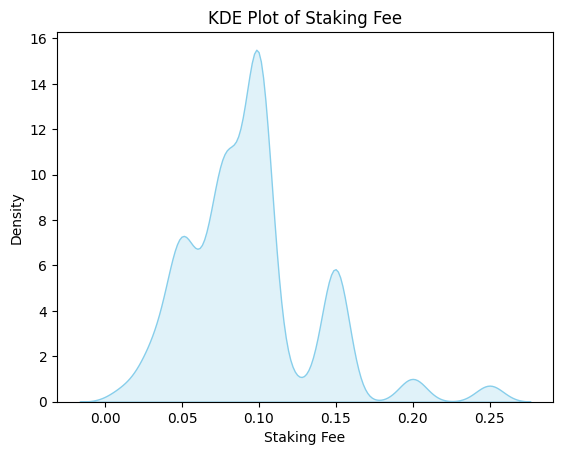

In [ ]:
#Explore the distribution of the baker staking fee using kde
sns.kdeplot(data1['staking_fee'], shade=True, color='skyblue')
plt.title('KDE Plot of Staking Fee')
plt.xlabel('Staking Fee')
plt.ylabel('Density')
plt.show()

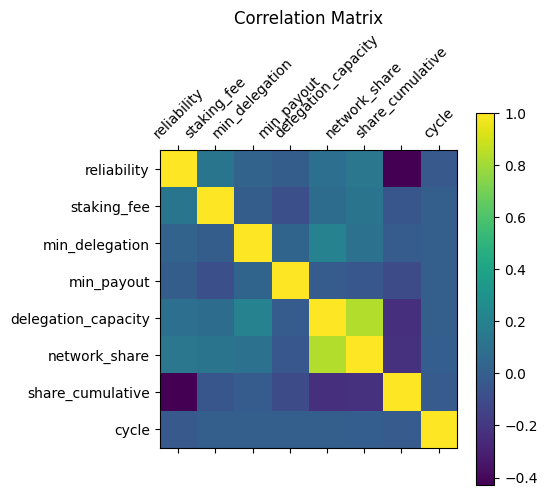

In [ ]:
#create correlation matrix
correlation_matrix = data1.corr(numeric_only=True)
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

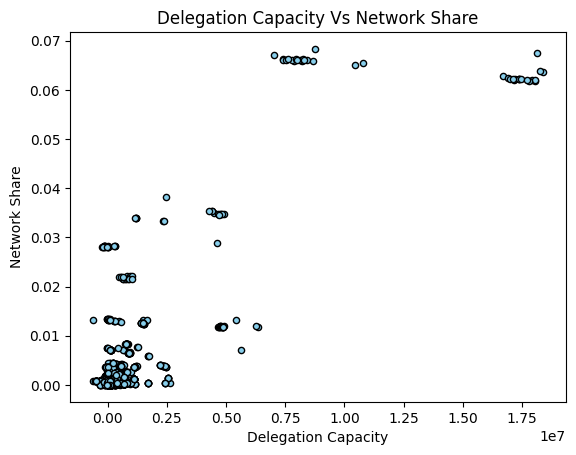

In [ ]:
#Explore the relationship between Delegation Capacity and Network share

data1.plot(kind = 'scatter', x = 'delegation_capacity', y = 'network_share',  color='skyblue', edgecolor='black')
plt.title('Delegation Capacity Vs Network Share')
plt.xlabel('Delegation Capacity')
plt.ylabel('Network Share')
plt.show()

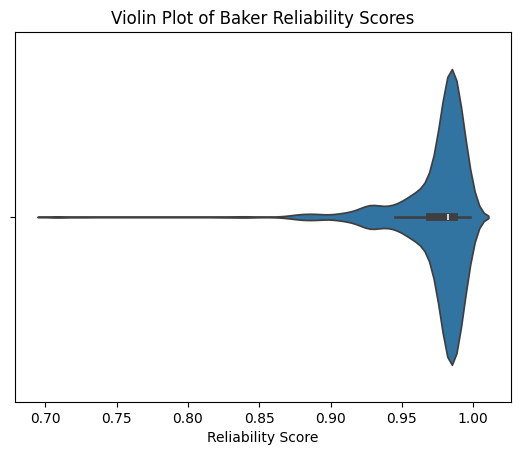

In [ ]:
# plot to show how reliable are the bakers using violineplot
sns.violinplot(x=data1['reliability'])
plt.title('Violin Plot of Baker Reliability Scores')
plt.xlabel('Reliability Score')
plt.show()

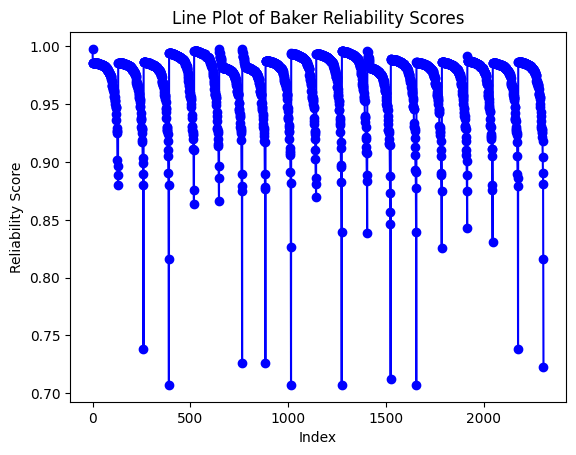

In [ ]:
# plot to show how reliable are the bakers using line plot
plt.plot(data1['reliability'], marker='o', linestyle='-', color='blue')
plt.title('Line Plot of Baker Reliability Scores')
plt.xlabel('Index')
plt.ylabel('Reliability Score')
plt.show()

In [ ]:
# Add a new column for shortened baker names
data1['short_baker'] = data1['baker'].apply(lambda x: f"{x[:6]}...{x[-4:]}")

data1.head()

baker status  reliability  staking_fee  \
0  tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1  tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4  tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   

   min_delegation  min_payout  delegation_capacity  network_share  \
0             0.0         0.0        -1.312674e+05        0.00001   
1             0.0         0.0        -6.716244e+03        0.00145   
2          1000.0         0.0         1.671672e+07        0.06274   
3             0.0         0.0         2.448521e+06        0.03825   
4             0.0         0.0         4.696616e+06        0.01183   

   share_cumulative  cycle    short_baker  
0           0.00001      1  tz1i5P...MB9f  
1           0.00146      1  tz1RV1...1er1  
2           0.06420      1  tz1VQn...3E1n  
3           0.10245      1  tz2FCN...HM93  
4           0.11428      1  tz1RCF...XBzv

In [ ]:
#remove duplicate using short baker column
unique_bakers = data1.drop_duplicates(subset='short_baker')

#unique bakers presence accros the cycles
unique_bakers = unique_bakers[['short_baker']].sum(axis = 1)

print(unique_bakers.shape)

(135,)


In [ ]:
# Create a summary DataFrame to track presence
summary = data1.pivot_table(index='short_baker', columns='cycle', aggfunc='size', fill_value=0)
summary['total_cycles'] = summary.sum(axis=1)

# Show the summary DataFrame
print(summary.head())


cycle          1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  \
short_baker                                                                    
tz1Kf2...83sY  1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1   1   1   
tz1KfE...Dp5j  1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1   1   1   
tz1Kwa...xe9u  1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1   1   1   
tz1KzS...kgdF  1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1   1   1   
tz1L6U...yrgz  1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1   1   1   

cycle          total_cycles  
short_baker                  
tz1Kf2...83sY            18  
tz1KfE...Dp5j            18  
tz1Kwa...xe9u            18  
tz1KzS...kgdF            18  
tz1L6U...yrgz            18  


In [ ]:
# Total number of cycles
total_cycles = data1['cycle'].nunique()

# Identify bakers who were present in all cycles
stayers = summary[summary['total_cycles'] == total_cycles].index.tolist()

# Identify bakers who missed one or more cycles but returned later
returned_bakers = summary[(summary['total_cycles'] < total_cycles) & (summary['total_cycles'] > 1)].index.tolist()

# Identify bakers who participated only once
single_cycle_bakers = summary[summary['total_cycles'] == 1].index.tolist()

# Print results
print(f'Bakers present in all cycles: {len(stayers)}')
print(f'Bakers who missed one or more cycles but returned later: {len(returned_bakers)}')
print(f'Bakers who participated only once: {len(single_cycle_bakers)}')


Bakers present in all cycles: 114
Bakers who missed one or more cycles but returned later: 20
Bakers who participated only once: 1


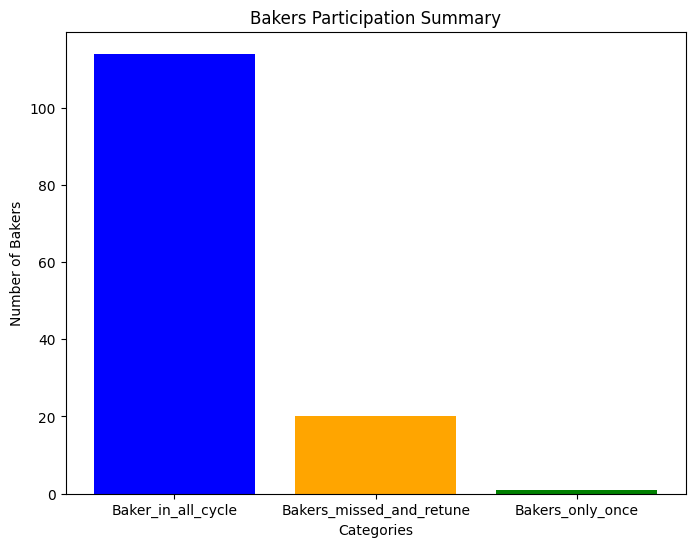

In [ ]:
# Data
categories = ['Baker_in_all_cycle', 'Bakers_missed_and_retune', 'Bakers_only_once']
counts = [len(stayers), len(returned_bakers), len(single_cycle_bakers)]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Categories')
plt.ylabel('Number of Bakers')
plt.title('Bakers Participation Summary')
plt.show()


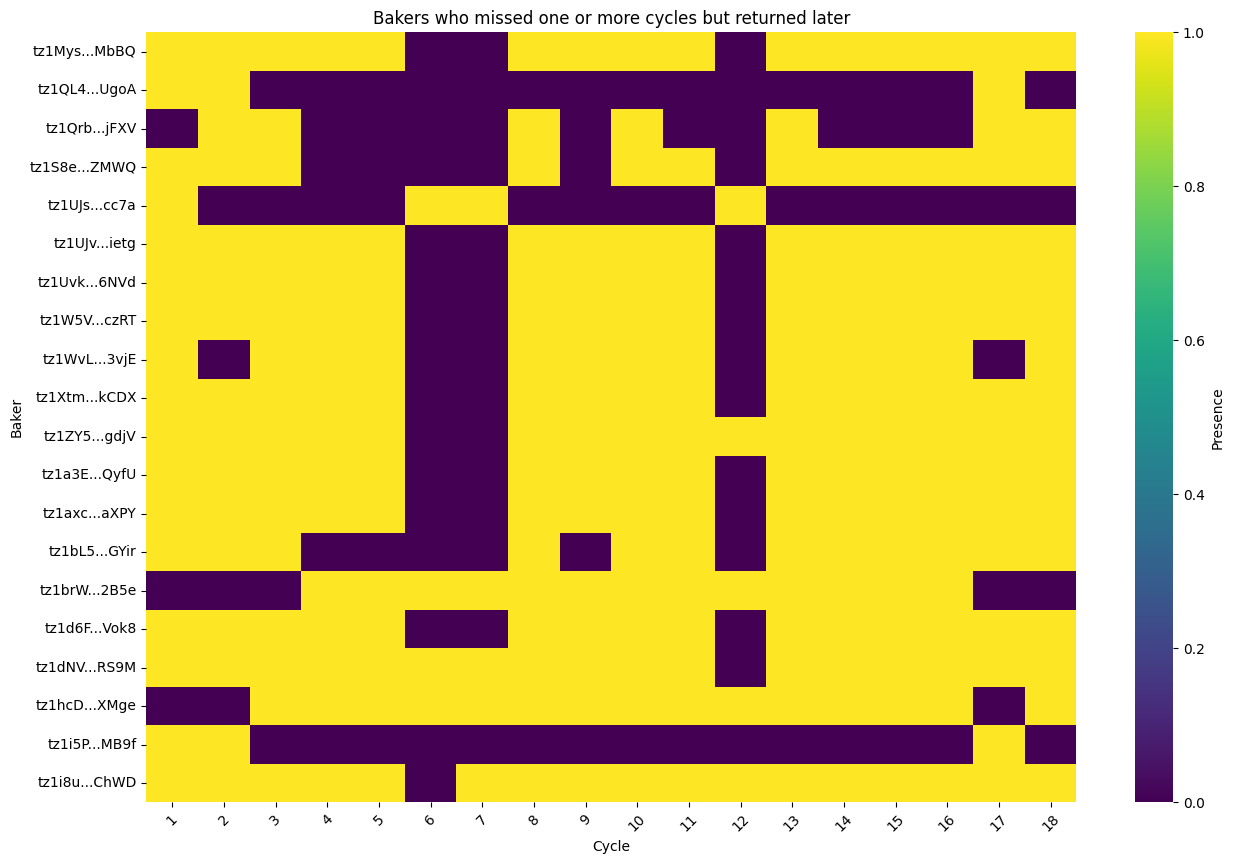

In [ ]:
# Melt the DataFrame for Bakers who missed one or more cycles but returned later
melted_summary = summary.loc[returned_bakers].drop(columns='total_cycles').reset_index().melt(id_vars='short_baker', var_name='cycle', value_name='presence')

# Plot
plt.figure(figsize=(15, 10))  # Increase the size of the plotting area
heatmap = sns.heatmap(melted_summary.pivot_table(index='short_baker', columns='cycle', values='presence', aggfunc='mean'), cmap='viridis', cbar_kws={'label': 'Presence'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Bakers who missed one or more cycles but returned later')
plt.xlabel('Cycle')
plt.ylabel('Baker')
plt.show()



cycle           1    2    3    4    5    6    7    8    9    10   11   12  \
short_baker                                                                 
tz1Kf2...83sY  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz1KfE...Dp5j  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz1Kwa...xe9u  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz1KzS...kgdF  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz1L6U...yrgz  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
tz1iMA...fdLQ  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz2BPb...L9E5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz2FCN...HM93  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz3bEQ...sRax  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
tz3e7L...9nWJ  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

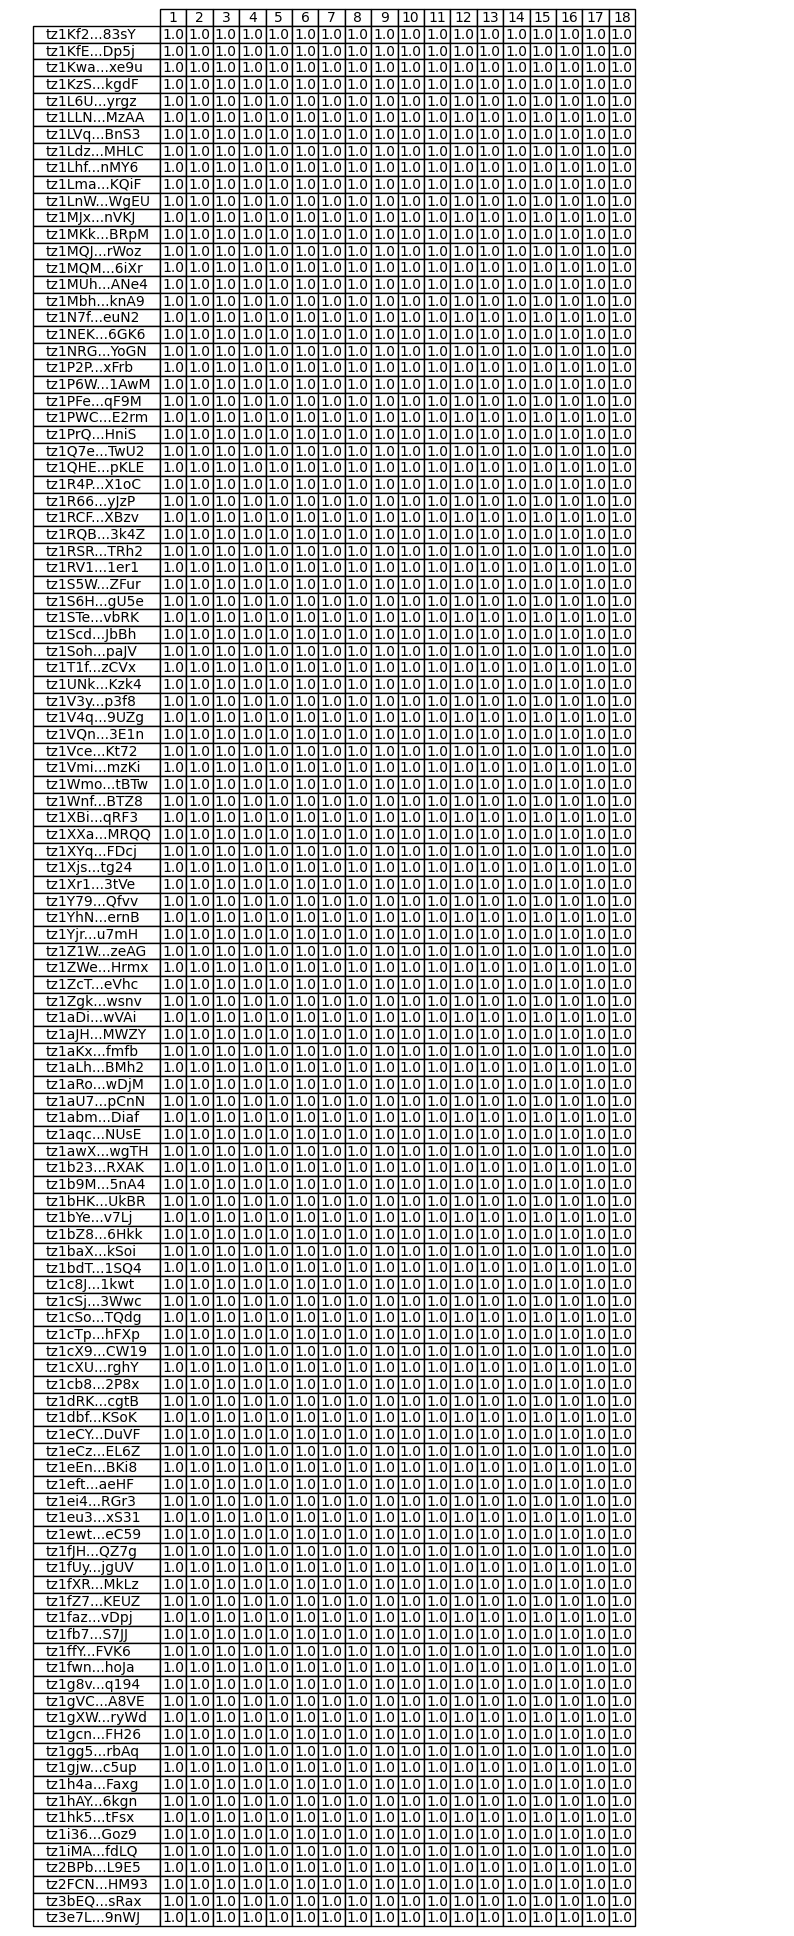

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `summary` is your DataFrame and `stayers` is a boolean mask for bakers present in all cycles
# Filter the summary DataFrame to include only the bakers present in all cycles
# filtered_summary = summary.loc[stayers].drop(columns='total_cycles').reset_index()

# Melt the DataFrame for Bakers present in all cycles
filtered_summary = summary.loc[stayers].drop(columns='total_cycles').reset_index().melt(id_vars='short_baker', var_name='cycle', value_name='presence')


# Pivot the DataFrame to get a tabular format
table_data = filtered_summary.pivot_table(index='short_baker', columns='cycle', values='presence', aggfunc='mean')

# Display the table
print(table_data)

# Optionally, you can save this table to a CSV file
table_data.to_csv('bakers_presence_table.csv', index=True)

# Plotting the table as an image using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_data.columns))))


plt.show()


In [ ]:
# Calculate the change in delegation_capacity for bakers present in all cycles
stayers_data = data1[data1['short_baker'].isin(stayers)]

# Pivot the data to compare metrics across cycles
pivot_data = stayers_data.pivot(index='short_baker', columns='cycle', values='delegation_capacity')

# Calculate changes in delegation capacity between cycles
for i in range(total_cycles - 1):
    cycle_1 = pivot_data.columns[i]
    cycle_2 = pivot_data.columns[i + 1]
    pivot_data[f'change_{cycle_1}_to_{cycle_2}'] = pivot_data[cycle_2] - pivot_data[cycle_1]

pivot_data


cycle                     1             2             3             4  \
short_baker                                                             
tz1Kf2...83sY -1.290968e+04 -1.649022e+04 -1.699951e+04 -3.136140e+04   
tz1KfE...Dp5j  5.153392e+05  5.389512e+05  5.752957e+05  5.482509e+05   
tz1Kwa...xe9u -1.825178e+02 -2.413497e+03 -1.045122e+03 -2.562289e+03   
tz1KzS...kgdF  1.831082e+04  1.808930e+04  1.861535e+04  3.382139e+04   
tz1L6U...yrgz  1.049853e+05  1.051804e+05  1.053183e+05  1.058600e+05   
...                     ...           ...           ...           ...   
tz1iMA...fdLQ  7.942745e+04  9.063456e+04  9.038315e+04  9.037631e+04   
tz2BPb...L9E5  2.936540e+05  2.000043e+05  1.983844e+05  2.033113e+05   
tz2FCN...HM93  2.448521e+06  4.391769e+06  4.483938e+06  1.196655e+06   
tz3bEQ...sRax  8.447732e+04  8.976715e+04  9.236471e+04  3.548725e+04   
tz3e7L...9nWJ  6.988315e+05  7.057353e+05  7.093144e+05  7.078491e+05   

cycle                     5             6             7             8  \
short_baker                                                             
tz1Kf2...83sY -3.255920e+04  8.874742e+04  1.056845e+05 -1.679215e+04   
tz1KfE...Dp5j  5.604268e+05  3.900976e+05  4.688560e+05  5.461477e+05   
tz1Kwa...xe9u -2.677878e+03 -2.922362e+04 -2.966098e+04 -1.194200e+03   
tz1KzS...kgdF  3.802282e+04  3.215011e+04  3.195764e+04  2.964005e+03   
tz1L6U...yrgz  1.058864e+05  1.166559e+05  1.167180e+05  1.053710e+05   
...                     ...           ...           ...           ...   
tz1iMA...fdLQ  9.110775e+04  9.309963e+04  9.203172e+04  9.058062e+04   
tz2BPb...L9E5  2.046415e+05  3.380437e+05  3.366154e+05  2.003042e+05   
tz2FCN...HM93  1.179838e+06  2.355168e+06  2.392323e+06  4.793967e+06   
tz3bEQ...sRax  3.530297e+04  4.758500e+04  4.747724e+04  9.493026e+04   
tz3e7L...9nWJ  6.866744e+05  7.043462e+05  6.963400e+05  7.203364e+05   

cycle                     9            10  ...  change_8_to_9  change_9_to_10  \
short_baker                                ...                                  
tz1Kf2...83sY -3.324311e+04 -1.668868e+04  ...  -1.645097e+04    1.655443e+04   
tz1KfE...Dp5j  5.693555e+05  5.584171e+05  ...   2.320777e+04   -1.093842e+04   
tz1Kwa...xe9u -2.971156e+03 -1.589043e+03  ...  -1.776955e+03    1.382112e+03   
tz1KzS...kgdF  3.477880e+04  1.132928e+03  ...   3.181479e+04   -3.364587e+04   
tz1L6U...yrgz  1.059130e+05  1.053973e+05  ...   5.420732e+02   -5.157339e+02   
...                     ...           ...  ...            ...             ...   
tz1iMA...fdLQ  9.141114e+04  9.100831e+04  ...   8.305122e+02   -4.028228e+02   
tz2BPb...L9E5  2.058753e+05  1.956447e+05  ...   5.571141e+03   -1.023058e+04   
tz2FCN...HM93  1.197401e+06  4.909989e+06  ...  -3.596566e+06    3.712588e+06   
tz3bEQ...sRax  3.518319e+04  9.585018e+04  ...  -5.974707e+04    6.066699e+04   
tz3e7L...9nWJ  6.907316e+05  7.254254e+05  ...  -2.960485e+04    3.469375e+04   

cycle          change_10_to_11  change_11_to_12  change_12_to_13  \
short_baker                                                        
tz1Kf2...83sY     8.112932e+02     8.069416e+04    -77926.455772   
tz1KfE...Dp5j     8.703722e+03    -1.064923e+05    107400.024240   
tz1Kwa...xe9u    -5.434503e+02    -3.384625e+04     34349.245708   
tz1KzS...kgdF     3.938254e+04    -4.878978e+03    -34542.394882   
tz1L6U...yrgz     3.200629e+02     1.174442e+04    -11957.465993   
...                        ...              ...              ...   
tz1iMA...fdLQ    -1.800167e+03     5.271172e+03     -5642.527137   
tz2BPb...L9E5     3.871469e+03     1.239414e+05   -126941.703134   
tz2FCN...HM93    -3.753008e+06     3.458989e+06     42874.218027   
tz3bEQ...sRax    -9.003996e+03    -4.335505e+04     51900.852466   
tz3e7L...9nWJ    -3.439815e+04    -9.466017e+04    134575.720846   

cycle          change_13_to_14  change_14_to_15  change_15_to_16  \
short_baker                                                        
tz1Kf2...83sY      -652.2

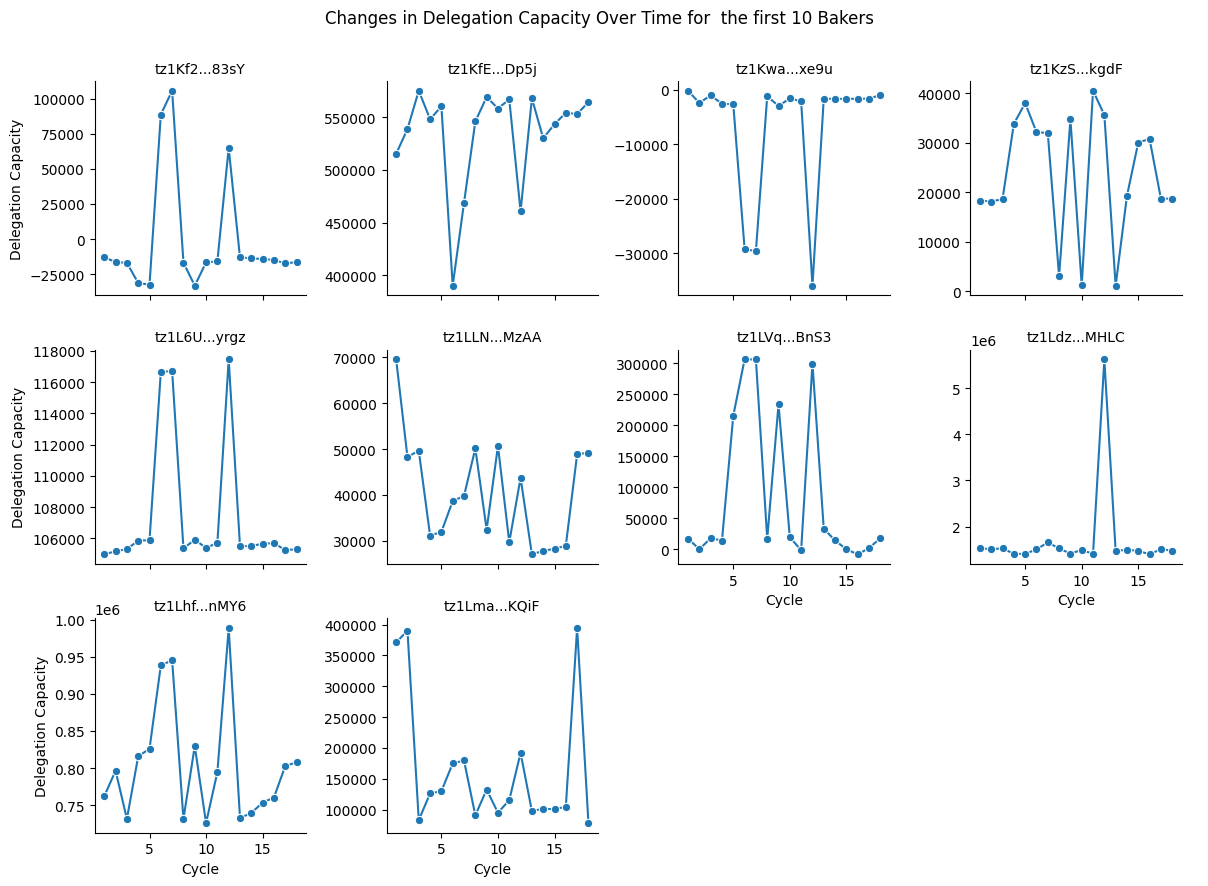

In [ ]:
# Assuming stayers_data is your DataFrame
# Pivot the data to compare metrics across cycles
pivot_data_long = stayers_data.pivot(index='short_baker', columns='cycle', values='delegation_capacity').reset_index()

# Filter the DataFrame to include only a subset of bakers, for example, the top 10 bakers
top_bakers = pivot_data_long.head(10)  # Adjust this line as needed

# Melt the filtered DataFrame
melted_data = top_bakers.melt(id_vars=['short_baker'], var_name='cycle', value_name='delegation_capacity')

# Set the size of the plot
g = sns.FacetGrid(melted_data, col='short_baker', col_wrap=4, sharey=False, sharex=True, height=3)

# Map the line plot to each subplot
g.map(sns.lineplot, 'cycle', 'delegation_capacity', marker='o')

# Set the titles and labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Cycle', 'Delegation Capacity')
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Changes in Delegation Capacity Over Time for  the first 10 Bakers')
plt.show()


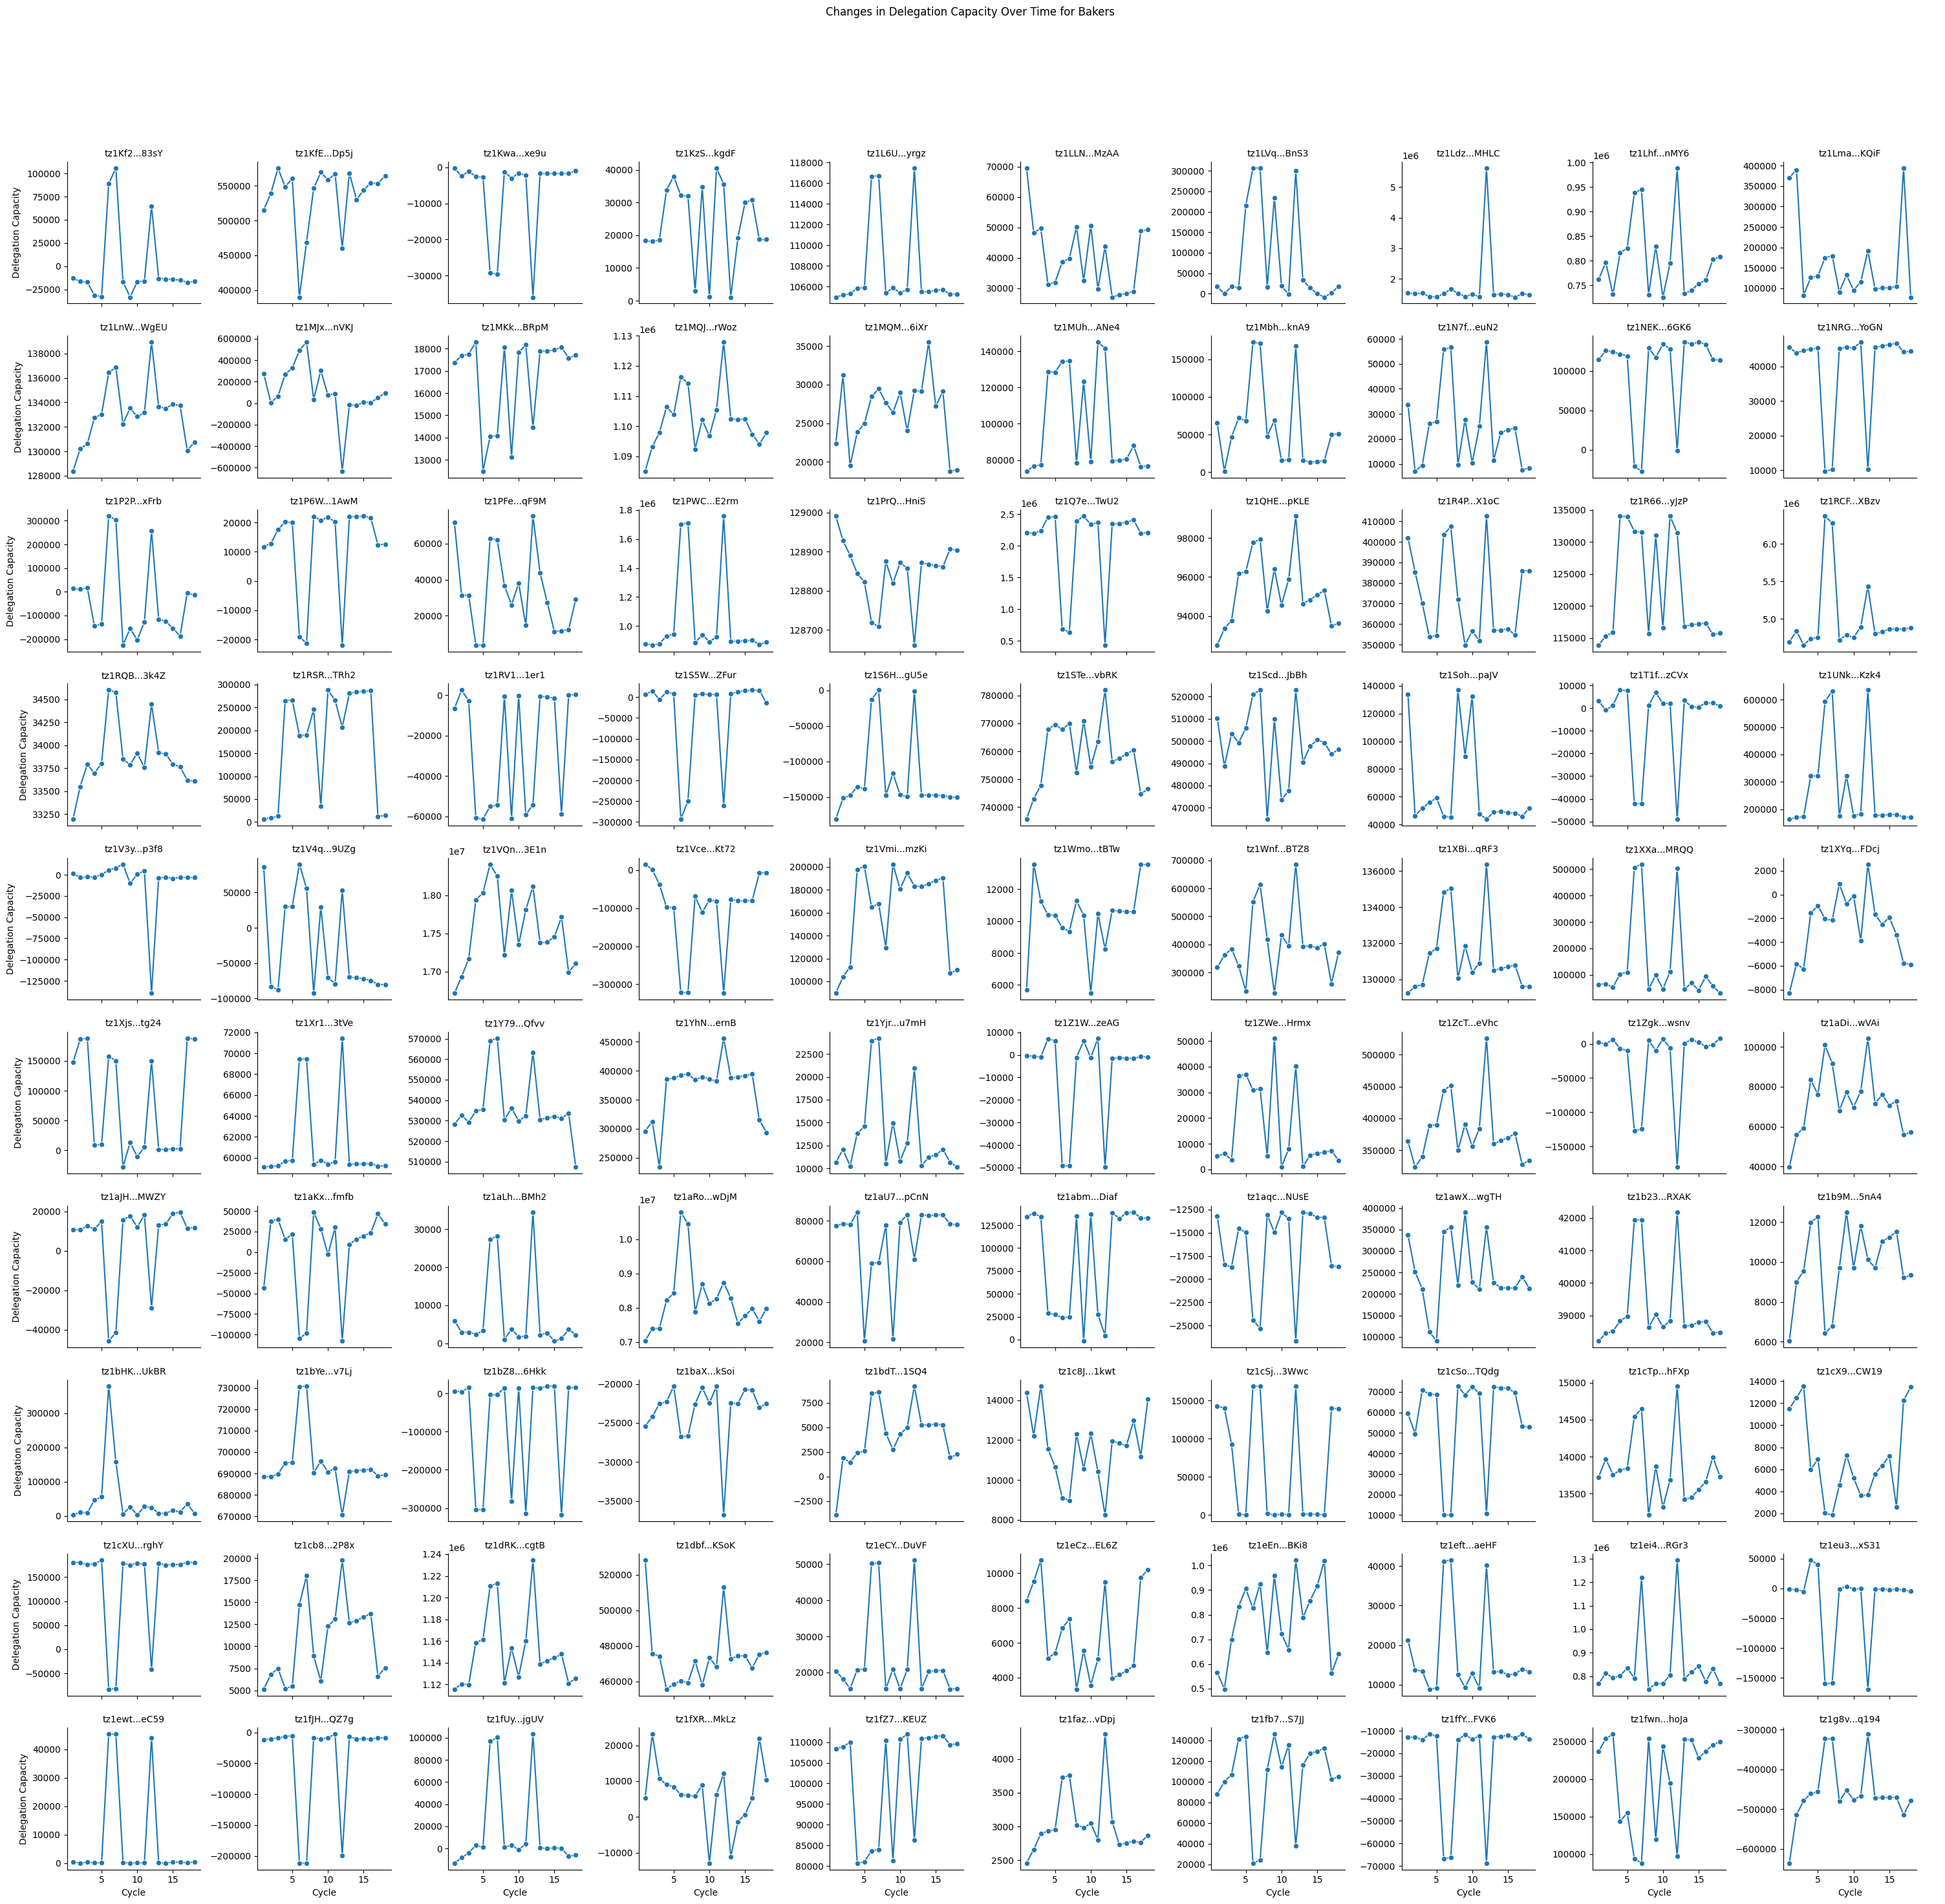

In [ ]:
# Assuming stayers_data is your DataFrame
# Pivot the data to compare metrics across cycles
pivot_data_long = stayers_data.pivot(index='short_baker', columns='cycle', values='delegation_capacity').reset_index()

# Filter the DataFrame to include only a subset of bakers, for example, the top 100 bakers
top_bakers = pivot_data_long.head(100)  # Adjust this line as needed

# Melt the filtered DataFrame
melted_data = top_bakers.melt(id_vars=['short_baker'], var_name='cycle', value_name='delegation_capacity')

# Set the size of the plot
g = sns.FacetGrid(melted_data, col='short_baker', col_wrap=10, sharey=False, sharex=True, height=3)

# Map the line plot to each subplot
g.map(sns.lineplot, 'cycle', 'delegation_capacity', marker='o')

# Set the titles and labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Cycle', 'Delegation Capacity')
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Changes in Delegation Capacity Over Time for Bakers')
plt.show()


In [ ]:
data1.head()

baker status  reliability  staking_fee  \
0  tz1i5PPsXa711EuZzped9jqPS8hGKsrCMB9f   open       0.9979       0.0498   
1  tz1RV1MBbZMR68tacosb7Mwj6LkbPSUS1er1   open       0.9861       0.0800   
2  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n   open       0.9860       0.1000   
3  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93   open       0.9860       0.0800   
4  tz1RCFbB9GpALpsZtu6J58sb74dm8qe6XBzv   open       0.9860       0.1000   

   min_delegation  min_payout  delegation_capacity  network_share  \
0             0.0         0.0        -1.312674e+05        0.00001   
1             0.0         0.0        -6.716244e+03        0.00145   
2          1000.0         0.0         1.671672e+07        0.06274   
3             0.0         0.0         2.448521e+06        0.03825   
4             0.0         0.0         4.696616e+06        0.01183   

   share_cumulative  cycle    short_baker  
0           0.00001      1  tz1i5P...MB9f  
1           0.00146      1  tz1RV1...1er1  
2           0.06420      1  tz1VQn...3E1n  
3           0.10245      1  tz2FCN...HM93  
4           0.11428      1  tz1RCF...XBzv

In [ ]:
# from sklearn.cluster import KMeans
# import seaborn as sns
# import matplotlib.pyplot as plt

# # K-means clustering including 'staking_fee'
# features = data1[['staking_fee', 'reliability', 'delegation_capacity']]
# kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
# data1['cluster'] = kmeans.labels_

# # Plot clusters
# sns.scatterplot(x='staking_fee', y='reliability', hue='cluster', data=data1, palette='viridis')
# plt.title('K-means Clustering of Bakers')
# plt.xlabel('Staking Fee')
# plt.ylabel('Reliability')
# plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# import seaborn as sns
# import matplotlib.pyplot as plt

# # K-means clustering including 'staking_fee'
# features = data1[['delegation_capacity', 'reliability', 'staking_fee']]
# kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
# data1['cluster'] = kmeans.labels_

# # Plot clusters
# sns.scatterplot(x='delegation_capacity', y='reliability', hue='cluster', data=data1, palette='viridis')
# plt.title('K-means Clustering of Bakers')
# plt.xlabel('Delegation Capacity')
# plt.ylabel('Reliability')
# plt.show()


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# # 3D Plot of Clusters
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot
# scatter = ax.scatter(data1['staking_fee'], data1['reliability'], data1['delegation_capacity'], c=data1['cluster'], cmap='viridis')

# # Labels and Title
# ax.set_title('3D K-means Clustering of Bakers')
# ax.set_xlabel('Staking Fee')
# ax.set_ylabel('Reliability')
# ax.set_zlabel('Delegation Capacity')

# # Colorbar
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)

# plt.show()


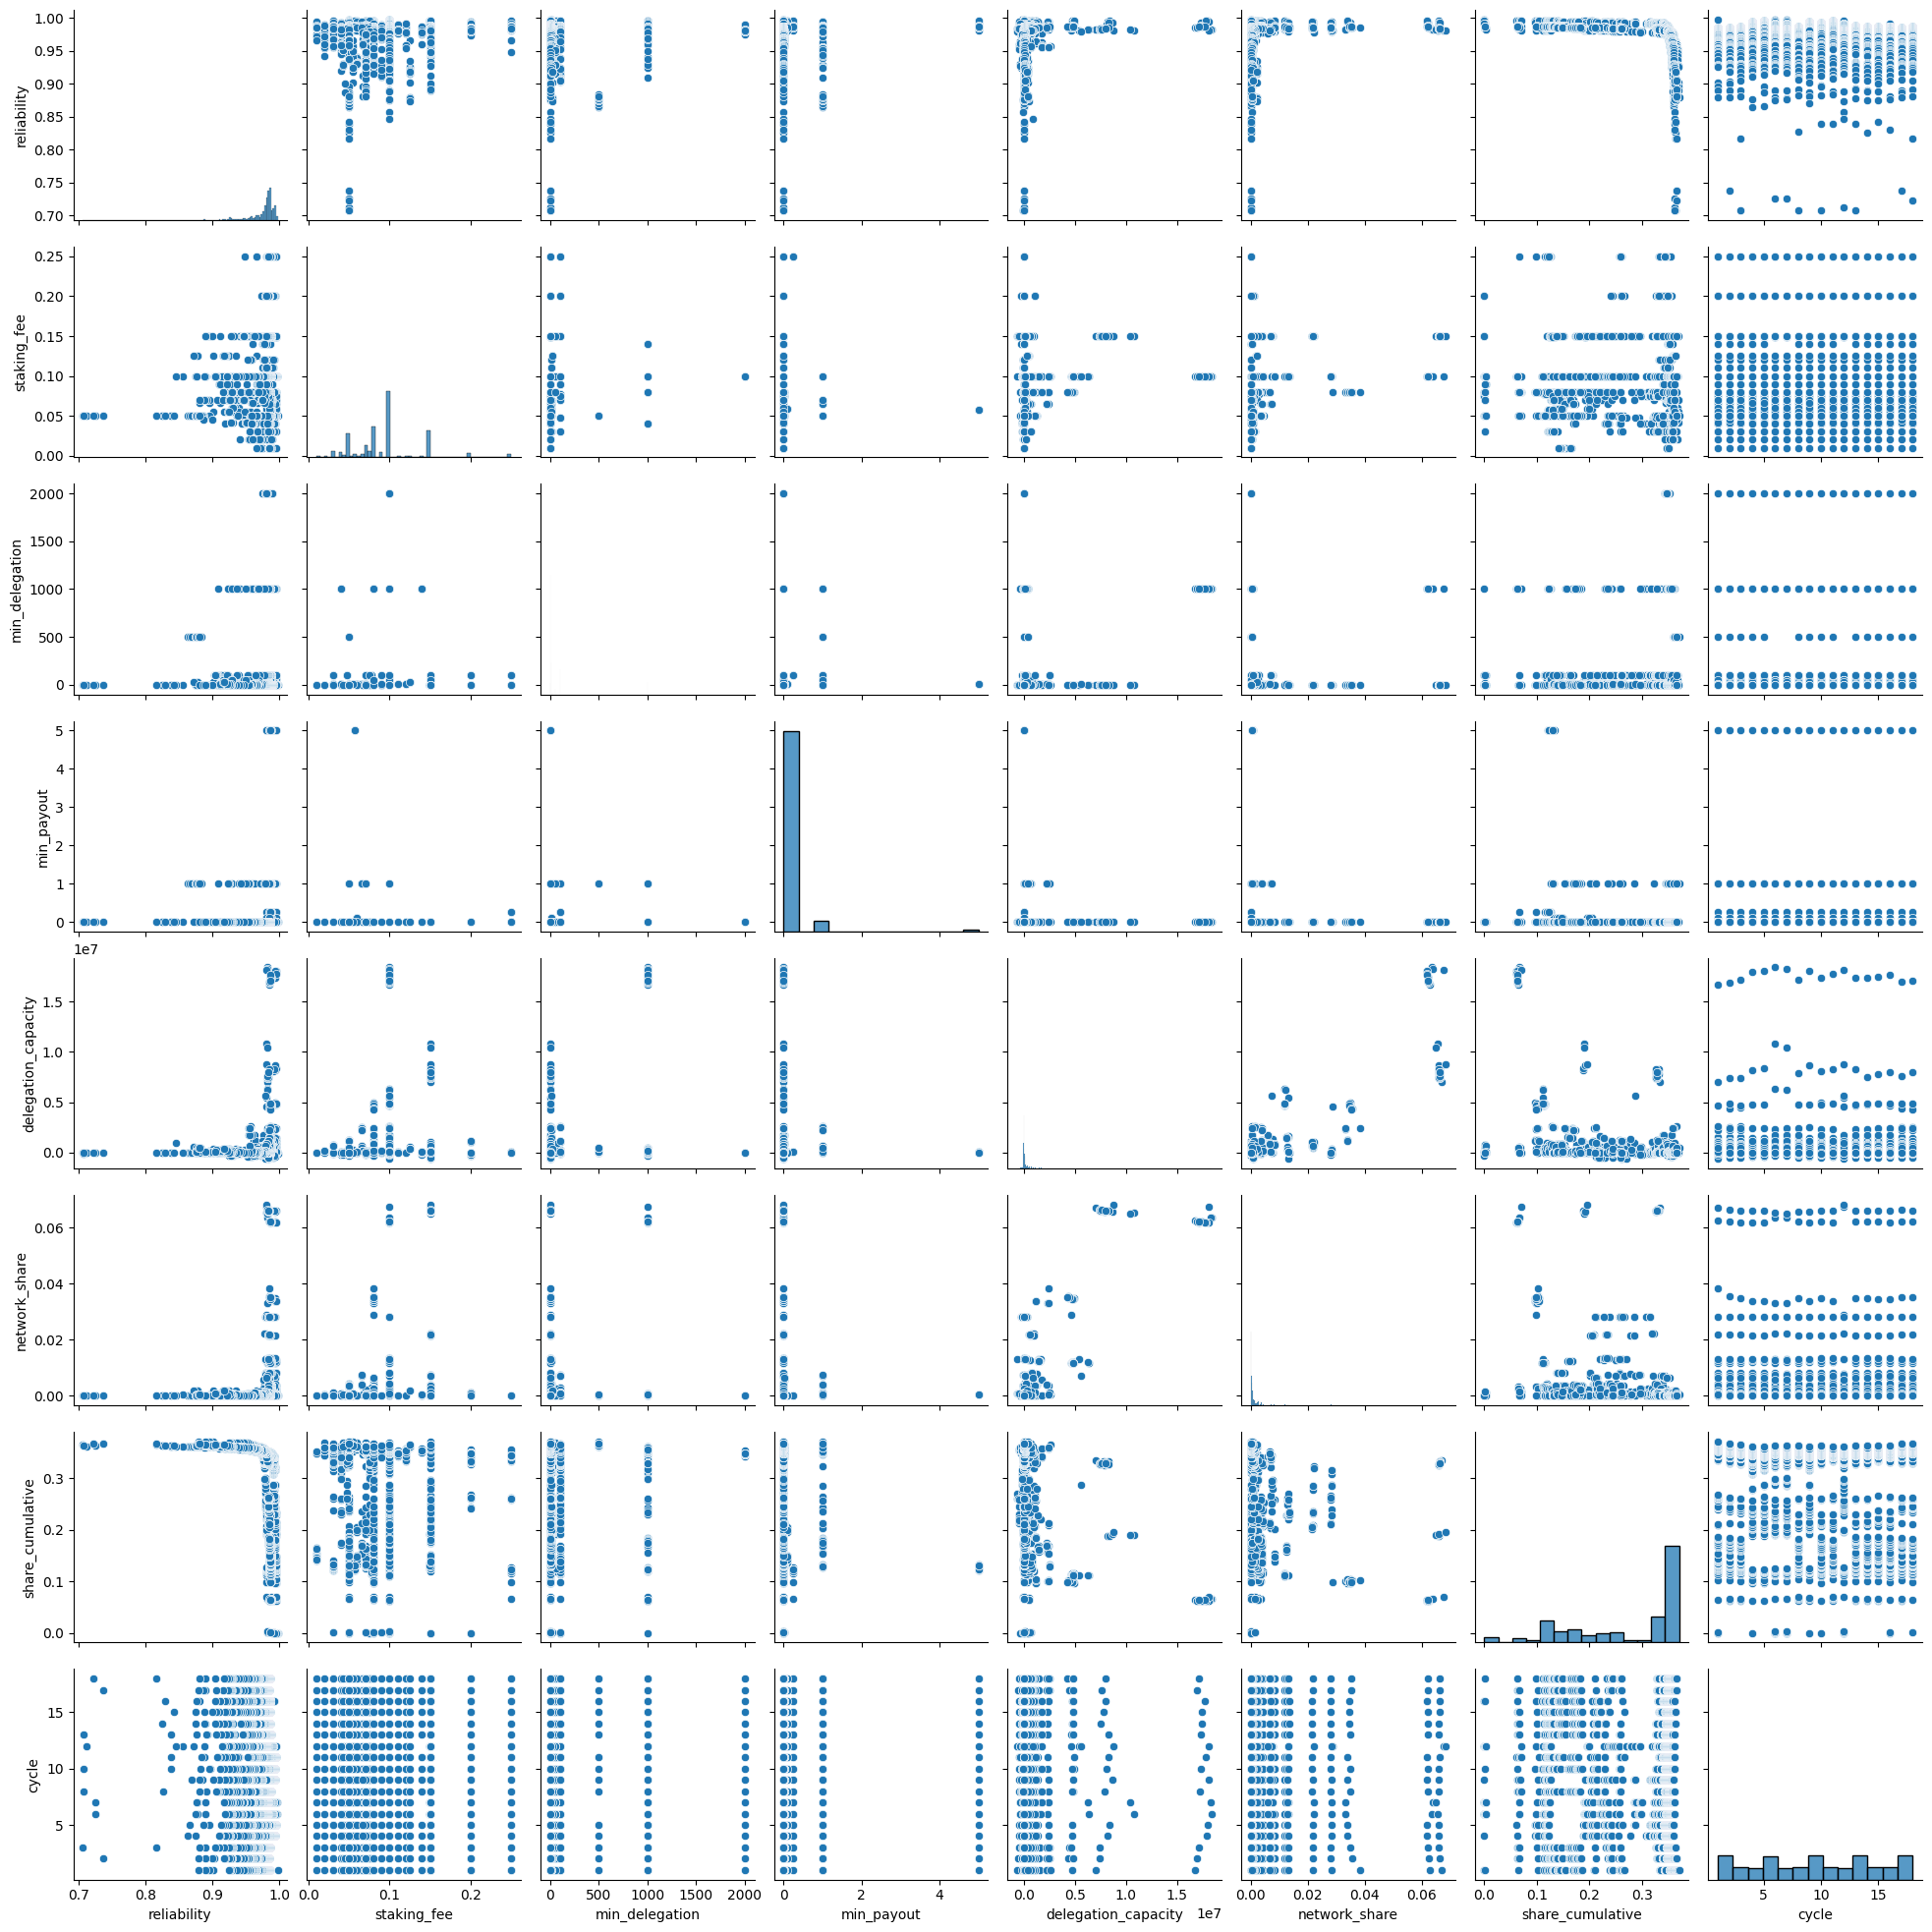

In [ ]:
#pairplot to show relationships between the datapoints
sns.pairplot(data1)

## Top 20 in each Cycle Dataset


In [ ]:
data2 = pd.read_csv('merged_cycle_files')

In [ ]:
data2.head()

rank                                 baker         stake      diff  blocks  \
0     1  tz1irJKkXS2DBWkU1NnmFQx1c1L7pbGg4yhk  1.028062e+08  0.002301    2492   
1     2  tz1aRoaRhSpRYvFdyvgWLL6TGyRoGF51wDjM  4.507493e+07 -0.004270    1088   
2     3  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n  4.206607e+07 -0.000167    1060   
3     4  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93  2.643374e+07 -0.008029     639   
4     5  tz1gfArv665EUkSg2ojMBzcbfwuPxAvqPvjo  2.009986e+07  0.000669     488   

   endorsements  reliability   share  share_cumulative  cycle  
0      17562931       0.9990  0.1499            0.1499      1  
1       7713294       0.9999  0.0657            0.2156      1  
2       7193863       0.9999  0.0613            0.2769      1  
3       4520656       0.9999  0.0385            0.3154      1  
4       3437323       0.9997  0.0293            0.3447      1

In [ ]:
data2.shape

(240, 10)

In [ ]:
data2.columns

Index(['rank', 'baker', 'stake', 'diff', 'blocks', 'endorsements',
       'reliability', 'share', 'share_cumulative', 'cycle'],
      dtype='object')

In [ ]:
data2.isnull().sum()

rank                0
baker               0
stake               0
diff                0
blocks              0
endorsements        0
reliability         0
share               0
share_cumulative    0
cycle               0
dtype: int64

In [ ]:
unique_values = data2.nunique()

print(unique_values)

rank                 20
baker                20
stake               240
diff                240
blocks              184
endorsements        240
reliability          50
share                88
share_cumulative    215
cycle                12
dtype: int64


In [ ]:
# duplicate = data2.duplicated()

print(f'Number of duplicated rows: {data2.duplicated().sum()}')

Number of duplicated rows: 0


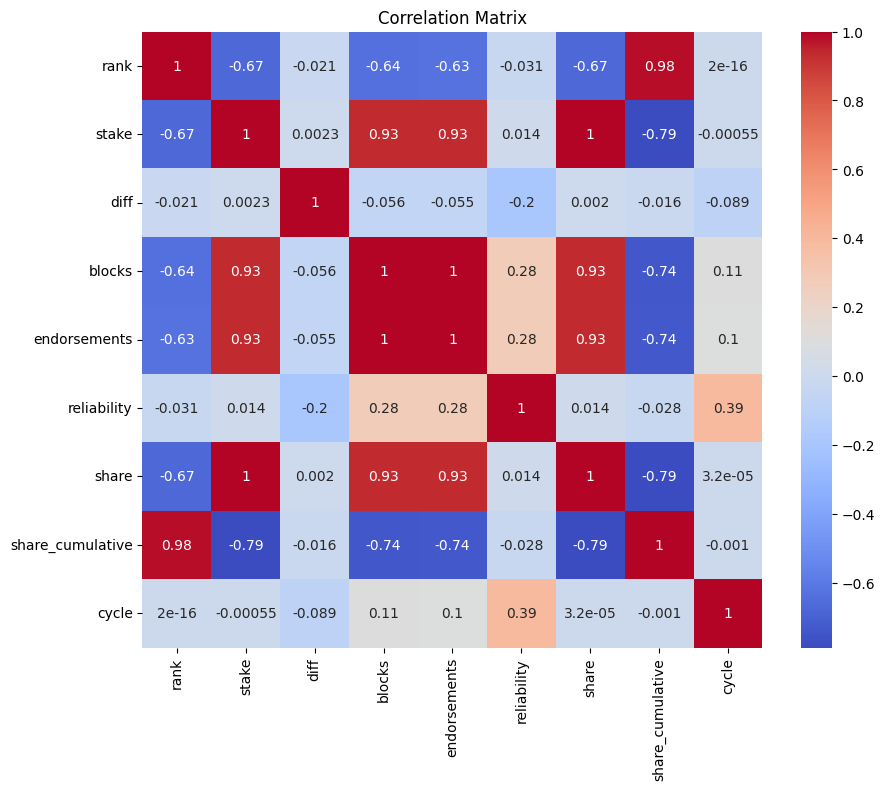

In [ ]:
corr_matrix = data2.corr(numeric_only = True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

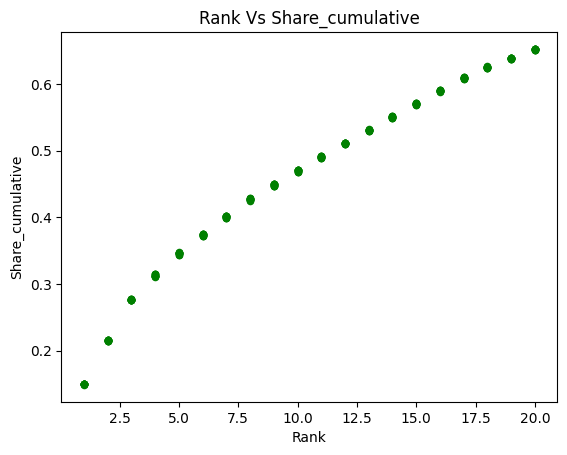

In [ ]:
#plot to examine the relationship between rank and share cumulative
data2.plot(kind = 'scatter', x = 'rank', y = 'share_cumulative', c = 'green')

plt.xlabel('Rank')
plt.ylabel('Share_cumulative')
plt.title("Rank Vs Share_cumulative")
plt.show()

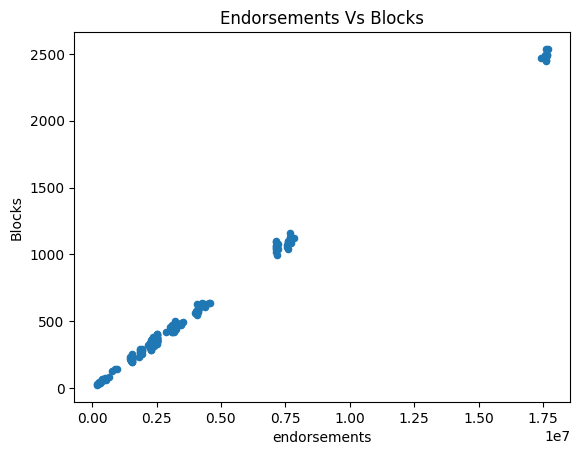

In [ ]:
#plot to examine the relationship between endorsement and blocks
data2.plot(kind = 'scatter', x = 'endorsements', y = 'blocks')

plt.title("Endorsements Vs Blocks")
plt.xlabel('endorsements')
plt.ylabel('Blocks')
plt.show()

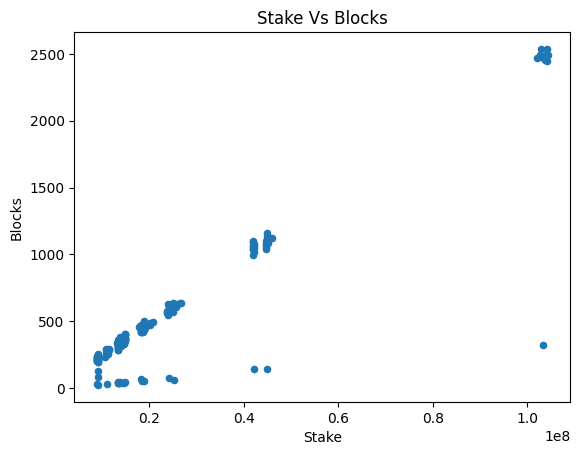

In [ ]:
#plot to examine the relationship between stake and blocks
data2.plot(kind = 'scatter', x = 'stake', y = 'blocks')

plt.title("Stake Vs Blocks")
plt.xlabel('Stake')
plt.ylabel('Blocks')
plt.show()

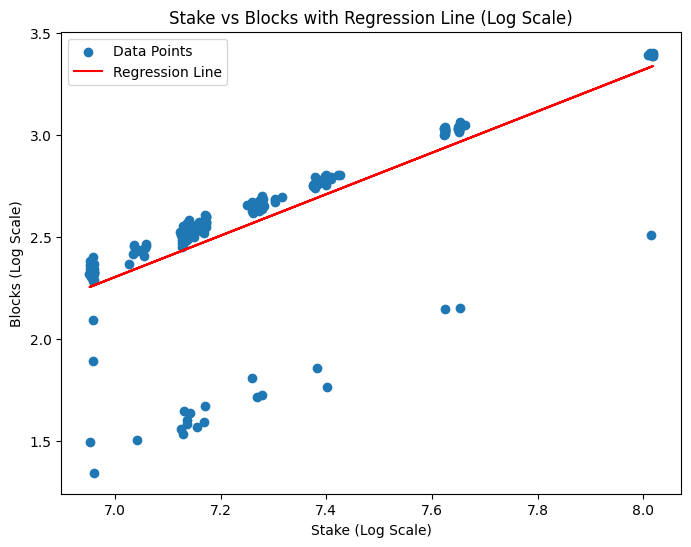

Intercept: -4.81884054034378
Coefficient: 1.0173980682988941


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
# Assuming your data is in a DataFrame called `data` with 'Stake' and 'Blocks' columns

# Taking log of the variables for normalization
data2['log_Stake'] = np.log10(data2['stake'])
data2['log_Blocks'] = np.log10(data2['blocks'])

# Linear Regression
X = data2['log_Stake'].values.reshape(-1, 1)
y = data2['log_Blocks'].values

reg = LinearRegression().fit(X, y)

# Predicting values
y_pred = reg.predict(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data2['log_Stake'], data2['log_Blocks'], label='Data Points')
plt.plot(data2['log_Stake'], y_pred, color='red', label='Regression Line')
plt.title('Stake vs Blocks with Regression Line (Log Scale)')
plt.xlabel('Stake (Log Scale)')
plt.ylabel('Blocks (Log Scale)')
plt.legend()
plt.show()

# Print out the regression coefficients
print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")


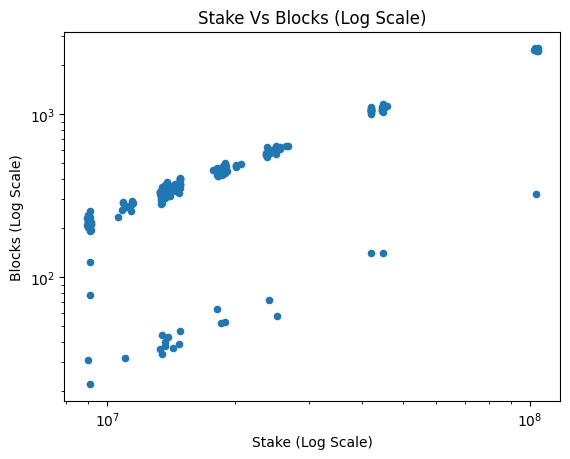

In [ ]:
# Plot to examine the relationship between stake and blocks with logarithmic scale
ax = data2.plot(kind='scatter', x='stake', y='blocks')

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title("Stake Vs Blocks (Log Scale)")
plt.xlabel('Stake (Log Scale)')
plt.ylabel('Blocks (Log Scale)')
plt.show()

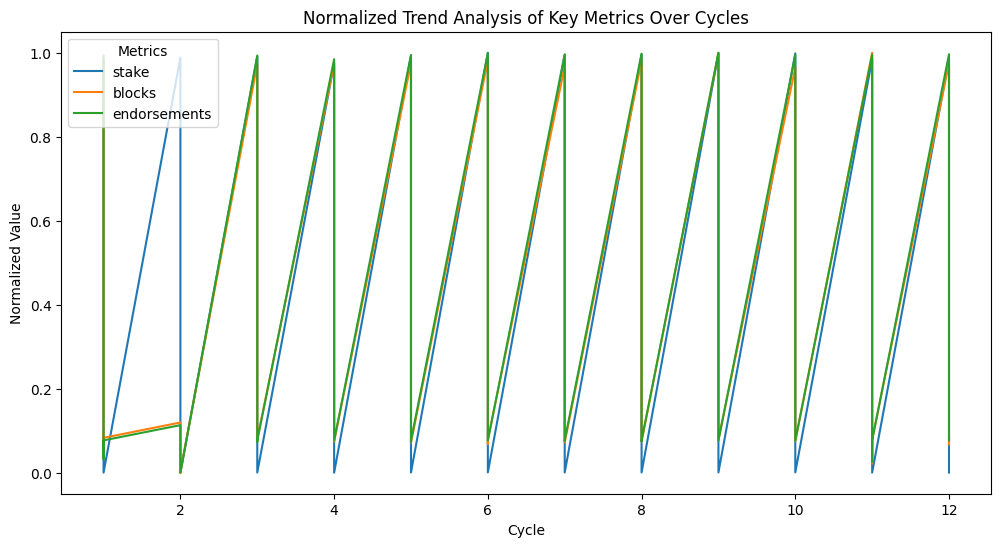

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data2[['stake', 'blocks', 'endorsements']])
normalized_df = pd.DataFrame(normalized_data, columns=['stake', 'blocks', 'endorsements'], index=data2['cycle'])

normalized_df.plot(figsize=(12, 6))
plt.title('Normalized Trend Analysis of Key Metrics Over Cycles')
plt.xlabel('Cycle')
plt.ylabel('Normalized Value')
plt.legend(title='Metrics')
plt.show()

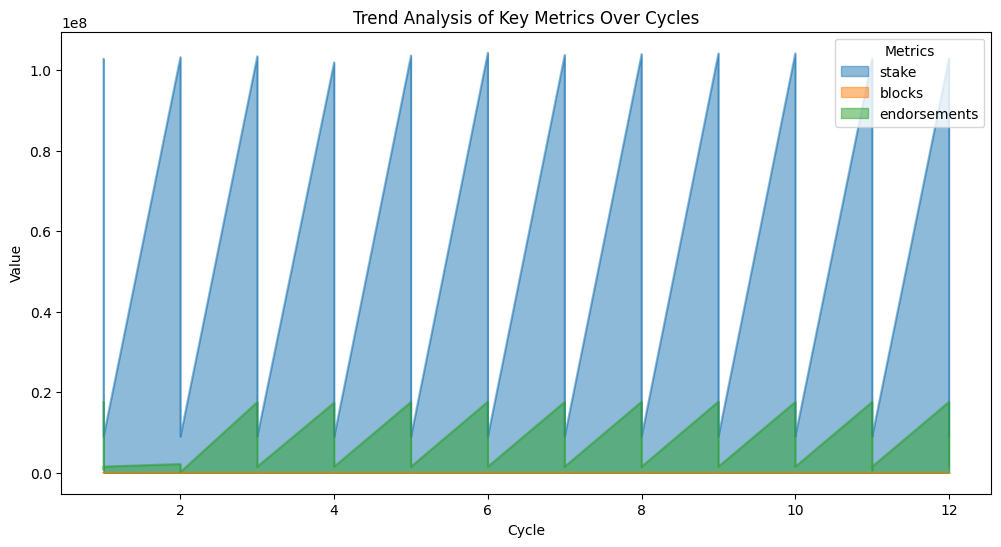

In [ ]:
#plot to examine the Trend Analysis of Key Metrics Over Cycles
data2.set_index('cycle')[['stake', 'blocks', 'endorsements']].plot(kind='area', stacked=False, figsize=(12, 6))
plt.title('Trend Analysis of Key Metrics Over Cycles')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.legend(title='Metrics')
plt.show()


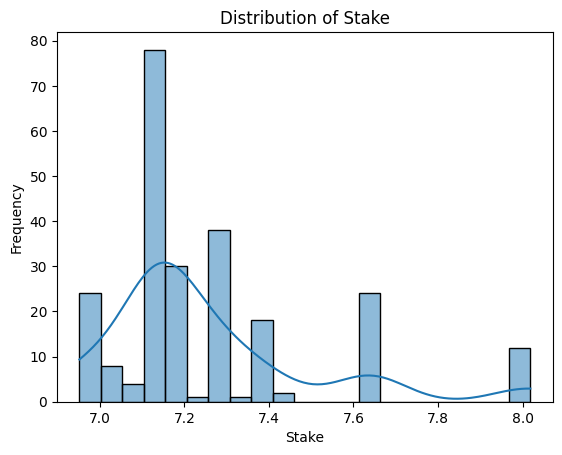

In [ ]:
# Histogram for stake distribution
data2['log_stake'] = np.log10(data2['stake'])
sns.histplot(data2['log_stake'], kde=True)
plt.title('Distribution of Stake')
plt.xlabel('Stake')
plt.ylabel('Frequency')
plt.show()


This image shows a histogram with an overlaid line plot, representing the distribution of stake in what appears to be the Tezos blockchain ecosystem.

Key observations:

1. The x-axis represents the stake amount, measured in units of 10^8 (as indicated by the 1.0 x 10^8 at the right end of the x-axis).

2. The y-axis represents the frequency or count of occurrences for each stake amount.

3. The distribution is heavily right-skewed, meaning there are many instances of smaller stake amounts and fewer instances of larger stakes.

4. There's a very high peak at the lower end of the stake distribution, with a frequency of over 80 occurrences for a relatively small stake amount.

5. The majority of the data points are clustered on the left side of the graph, indicating that most stakeholders have smaller amounts of stake.

6. There are a few isolated bars towards the right side of the graph, suggesting there are a small number of entities with much larger stakes.

7. The blue line overlaid on the histogram likely represents a smoothed probability density function, which helps visualize the overall shape of the distribution.

This distribution suggests that the Tezos staking ecosystem has a large number of smaller stakeholders and a small number of very large stakeholders. This kind of distribution is common in many financial and blockchain systems, often referred to as a power-law distribution or sometimes colloquially as the "80-20 rule" (where a small percentage of participants hold a large percentage of the resources).


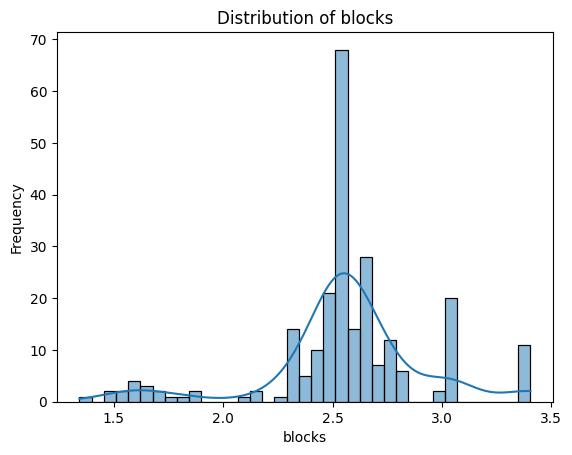

In [ ]:
# Histogram for block distribution
data2['log_blocks'] = np.log10(data2['blocks'])

sns.histplot( data2['log_blocks'], kde=True)
plt.title('Distribution of blocks')
plt.xlabel('blocks')
plt.ylabel('Frequency')
plt.show()


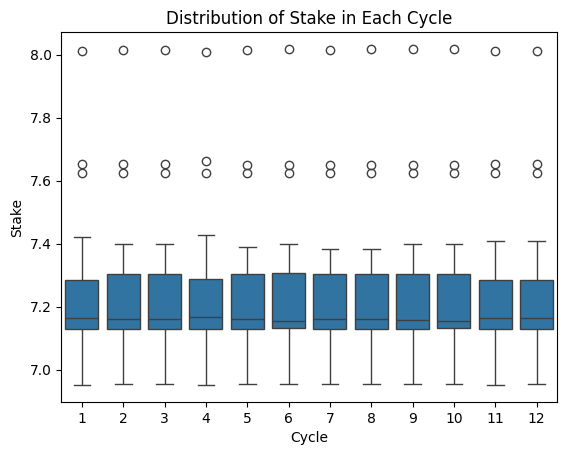

In [ ]:
#Distribution of Stake in Each Cycle
sns.boxplot(x='cycle', y='log_stake', data=data2)
plt.xlabel('Cycle')
plt.ylabel('Stake')
plt.title('Distribution of Stake in Each Cycle')
plt.show()

In [ ]:
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


rank                                 baker         stake      diff  blocks  \
0     1  tz1irJKkXS2DBWkU1NnmFQx1c1L7pbGg4yhk  1.028062e+08  0.002301    2492   
1     2  tz1aRoaRhSpRYvFdyvgWLL6TGyRoGF51wDjM  4.507493e+07 -0.004270    1088   
2     3  tz1VQnqCCqX4K5sP3FNkVSNKTdCAMJDd3E1n  4.206607e+07 -0.000167    1060   
3     4  tz2FCNBrERXtaTtNX6iimR1UJ5JSDxvdHM93  2.643374e+07 -0.008029     639   
4     5  tz1gfArv665EUkSg2ojMBzcbfwuPxAvqPvjo  2.009986e+07  0.000669     488   

   endorsements  reliability   share  share_cumulative  cycle  log_Stake  \
0      17562931       0.9990  0.1499            0.1499      1   8.012020   
1       7713294       0.9999  0.0657            0.2156      1   7.653935   
2       7193863       0.9999  0.0613            0.2769      1   7.623932   
3       4520656       0.9999  0.0385            0.3154      1   7.422159   
4       3437323       0.9997  0.0293            0.3447      1   7.303193   

   log_Blocks  log_stake  log_blocks  
0    3.396548   8.012020    3.396548  
1    3.036629   7.653935    3.036629  
2    3.025306   7.623932    3.025306  
3    2.805501   7.422159    2.805501  
4    2.688420   7.303193    2.688420

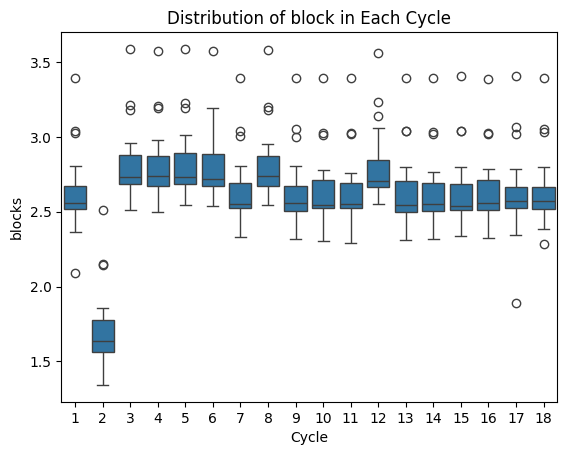

In [ ]:
#Distribution of block in Each Cycle
sns.boxplot(x='cycle', y='log_blocks', data=data2)
plt.xlabel('Cycle')
plt.ylabel('blocks')
plt.title('Distribution of block in Each Cycle')
plt.show()

In [ ]:
data2.columns

Index(['rank', 'baker', 'stake', 'diff', 'blocks', 'endorsements',
       'reliability', 'share', 'share_cumulative', 'cycle', 'log_Stake',
       'log_Blocks', 'log_stake', 'log_blocks'],
      dtype='object')

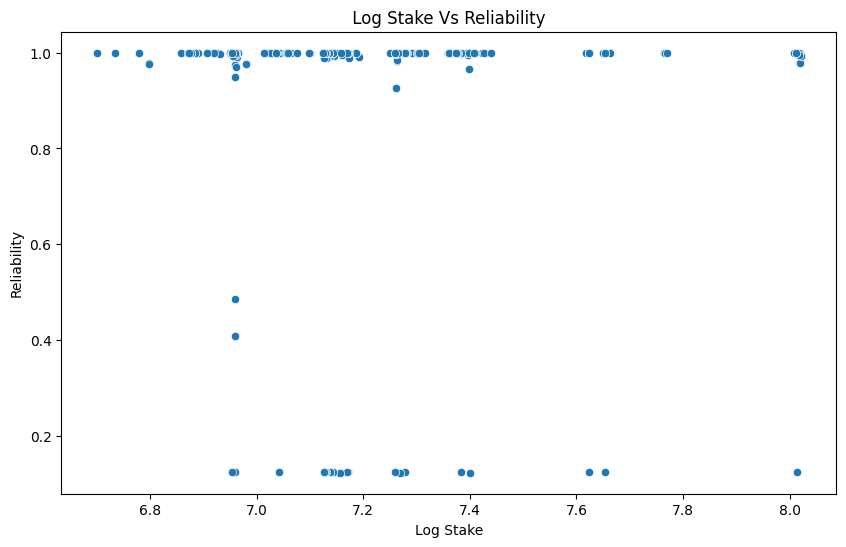

In [ ]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_stake', y='reliability', data=data2)

# Set the title and labels
plt.title(' Log Stake Vs Reliability ')
plt.xlabel('Log Stake')
plt.ylabel('Reliability')


# Show the plot
plt.show()

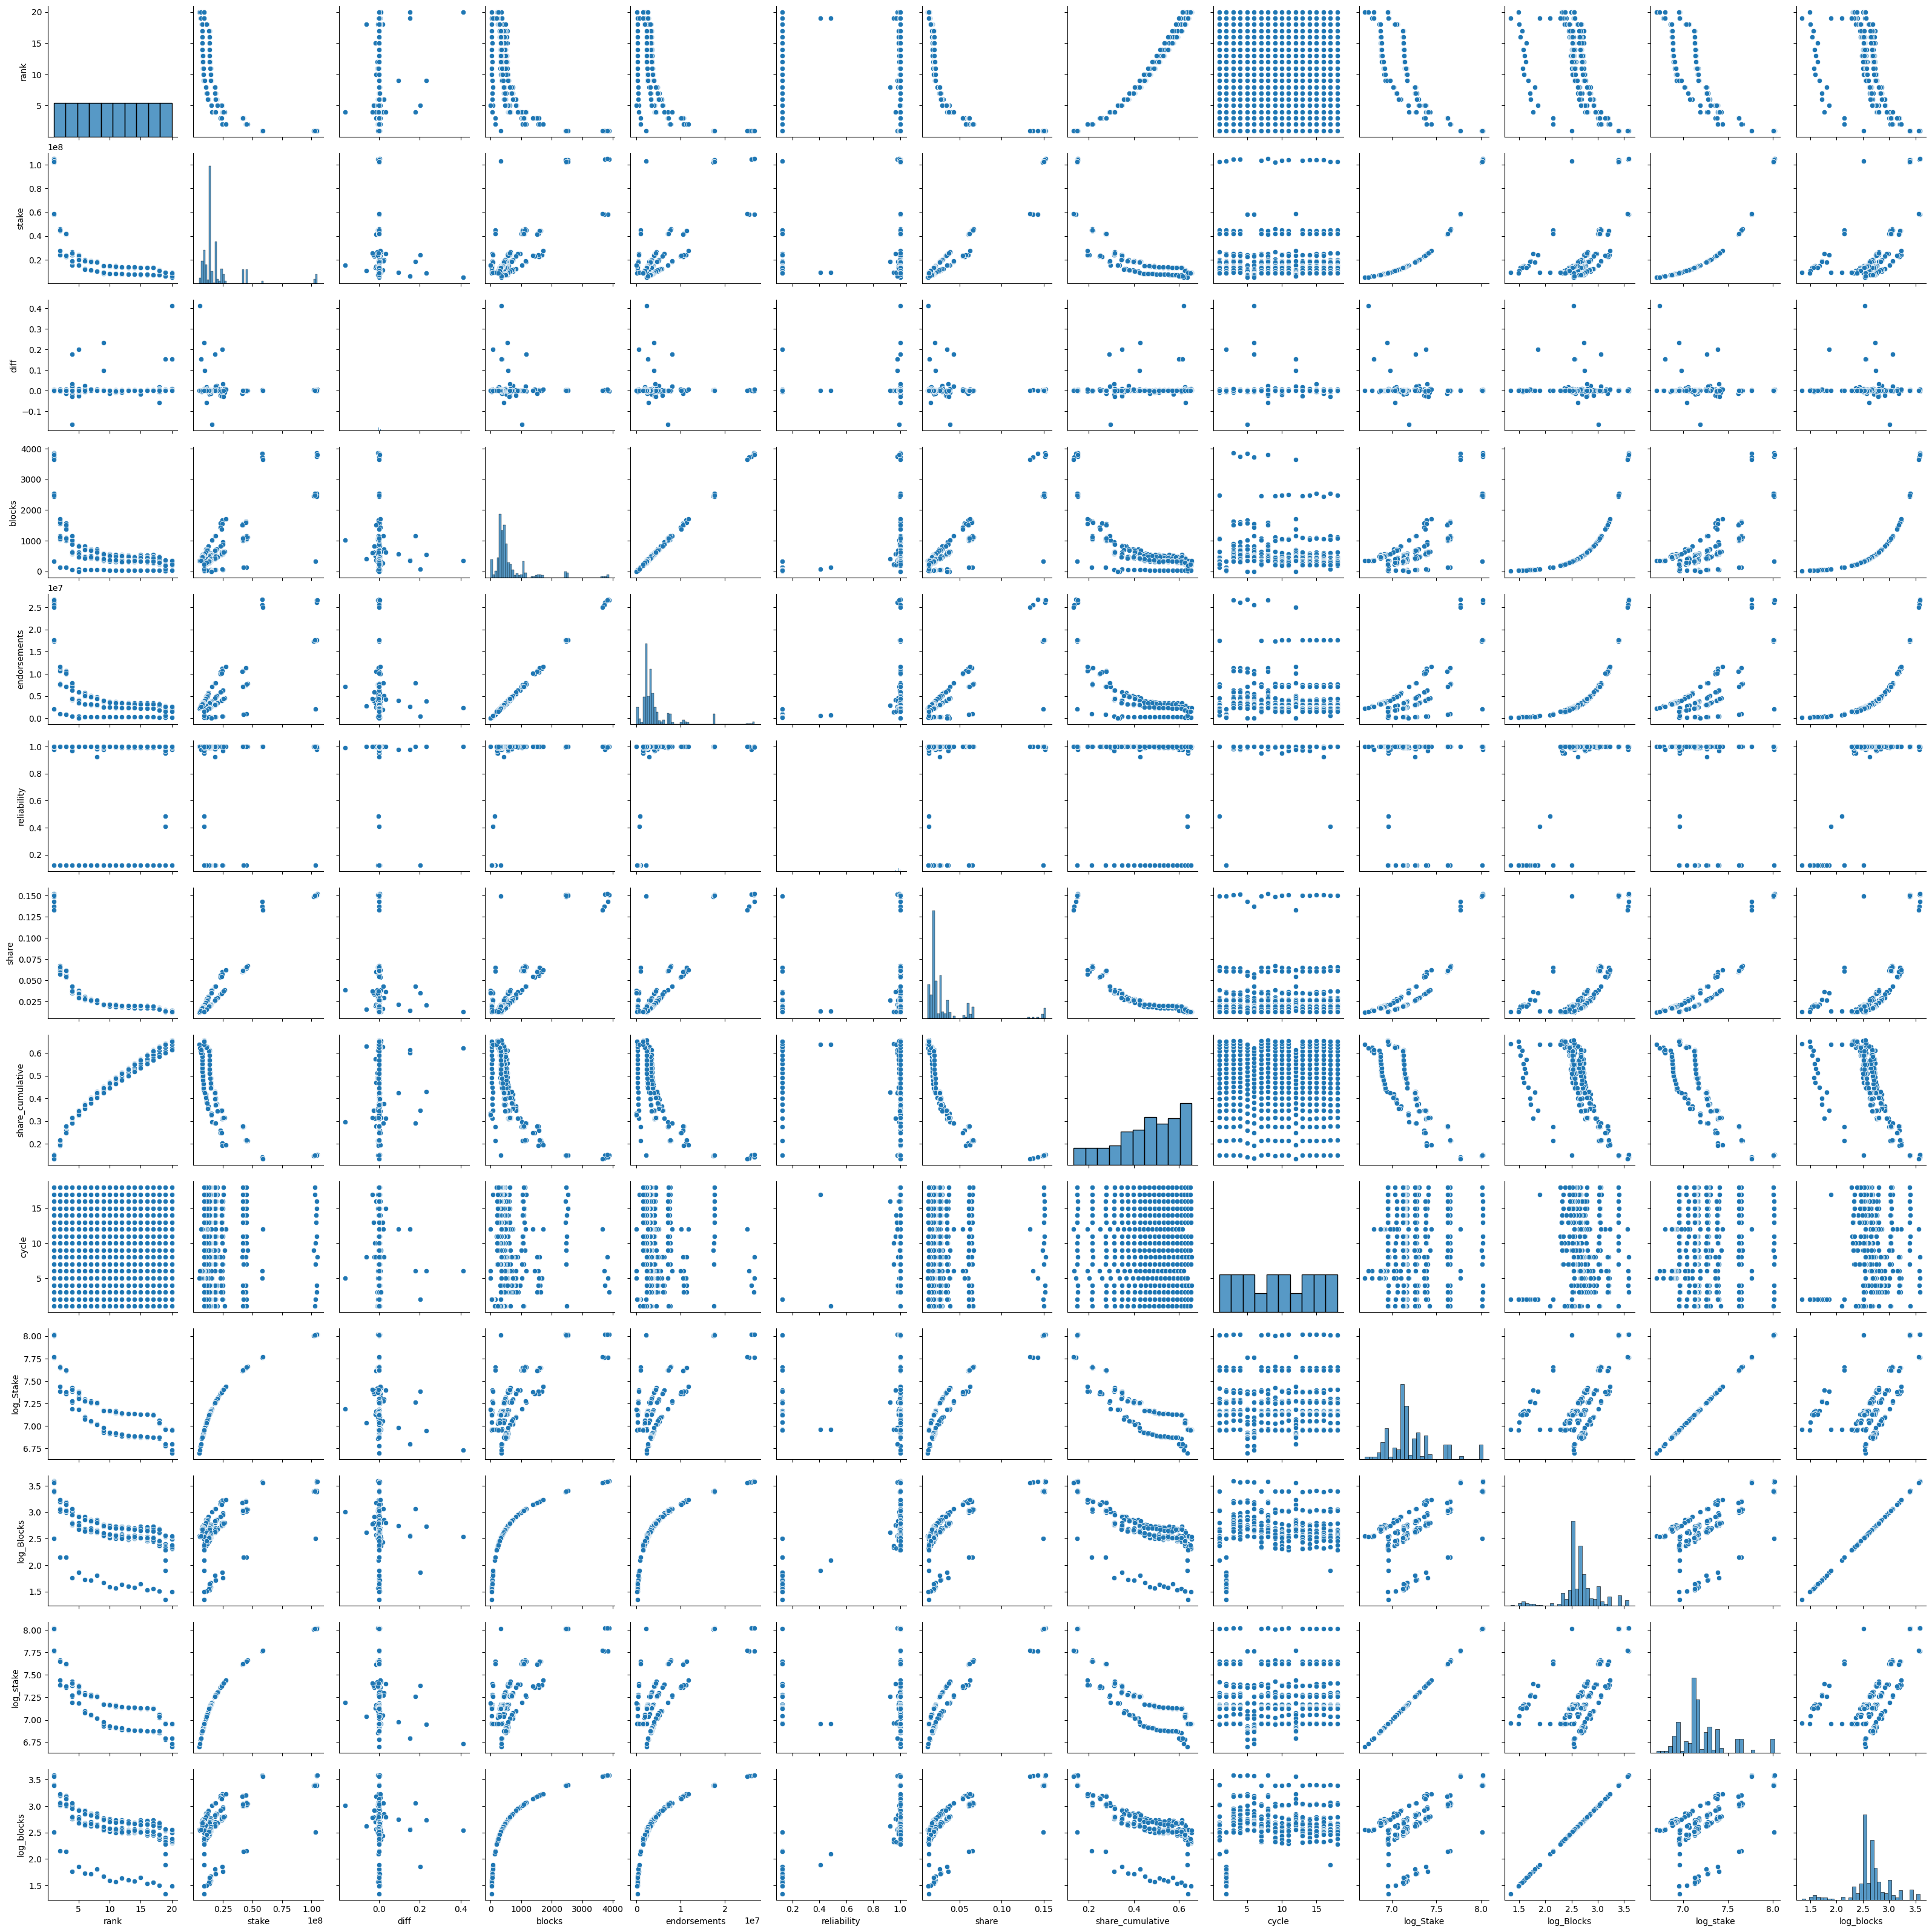

In [ ]:
sns.pairplot(data2)